In [95]:
from torch import nn
import torch
from scipy.special import comb
from feature_map import feature_map_circuit, feature_map_quantum_state
import numpy as np
import perceval as pcvl
from perceval import BS, PS, PERM


def generate_perceval_circuit(m, list_gates, parameters):
    """
    
    :param m: 
    :param list_gates: list of (i,j), assume j > i
    :param parameters: 
    :return: 
    """
    circuit = pcvl.Circuit(m)  # Create an empty 3 mode circuit
    para_index = 0
    for (i,j) in list_gates:
        if i+1 != j:
            n = abs(j - i)
            permutation = [n-1] + list(range(1, n-1)) + [0]
            circuit.add(i+1, PERM(permutation))
        circuit.add(i, BS()).add(i+1, PS(phi=pcvl.P('phi_'+str(para_index)))).add(i, BS())
        para_index += 1
        if i+1 != j:
            n = abs(j - i)
            permutation = [n-1] + list(range(1, n-1)) + [0]
            circuit.add(i+1, PERM(permutation))
    
    params=circuit.get_parameters()
    for index in range(len(parameters)):
        params[index].set_value(parameters[index])
    return circuit


def run_perceval_circuit(input_state_list, circuit, m, n, postselect, samples):
    """
    :param input_state_list: 
    :param circuit: 
    :param m: 
    :param n: 
    :param postselect: 
    :param samples: 
    :return: torch tensor vector
    """
    proc = pcvl.Processor("SLOS", m)
    proc.set_circuit(circuit)
    proc.min_detected_photons_filter(postselect)
    proc.thresholded_output(True)
    proc.with_input(pcvl.BasicState(input_state_list))
    sampler = pcvl.algorithm.Sampler(proc, max_shots_per_call=samples)
    res = sampler.probs(samples)
    distribution = res["results"]
    return feature_map_quantum_state(distribution, (int)(comb(m,n)))


m = 5
n = 2
postselect = n
samples = 100
list_gates = [(0,2),(1,3),(0,1),(2,3),(1,3),(0,1),(2,3),(3,4),(1,3)]
device = torch.device("cpu")
# parameters = np.random.rand(len(list_gates))
parameters = nn.Parameter(torch.rand((len(list_gates),), device=device))
circuit = generate_perceval_circuit(m, list_gates, parameters)
# pcvl.pdisplay(circuit)
input_state_list = [1]*n+[0]*(m-n)
run_perceval_circuit(input_state_list, circuit, m, n, postselect, samples)

{
  |1,1,0,0,0>: 0.005543282795469305
  |1,0,1,0,0>: 0.04568470151863036
  |1,0,0,1,0>: 0.15345710208738417
  |1,0,0,0,1>: 0.653903647452913
  |0,1,1,0,0>: 0.00018919430224066013
  |0,1,0,1,0>: 0.0011432688408965187
  |0,1,0,0,1>: 0.00013444784208874321
  |0,0,1,1,0>: 0.0011286471067904137
  |0,0,1,0,1>: 0.03064610702405112
  |0,0,0,1,1>: 0.10816960102953567
}


tensor([6.5390e-01, 1.3445e-04, 3.0646e-02, 1.0817e-01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00], dtype=torch.float64)

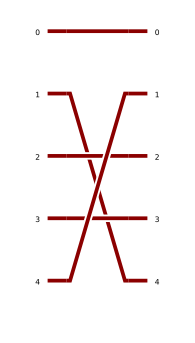

In [61]:
m = 5
circuit = pcvl.Circuit(m)
circuit.add(1, PERM([3, 1, 2, 0]))
pcvl.pdisplay(circuit)

In [65]:
def run_perceval_circuit(input_state_list, circuit, m, n, postselect, samples):
    """
    :param input_state_list: 
    :param circuit: 
    :param m: 
    :param n: 
    :param postselect: 
    :param samples: 
    :return: torch tensor vector
    """
    proc = pcvl.Processor("SLOS", m)
    proc.set_circuit(circuit)
    proc.min_detected_photons_filter(postselect)
    proc.thresholded_output(True)
    proc.with_input(pcvl.BasicState(input_state_list))
    sampler = pcvl.algorithm.Sampler(proc, max_shots_per_call=samples)
    res = sampler.probs(samples)
    distribution = res["results"]
    return feature_map_quantum_state(distribution, (int)(comb(m,n)))

[3, 1, 2, 0]